In [72]:
# === Data Handling & Preprocessing ===
import pandas as pd                         # For loading and handling datasets
import nltk                                 # Natural Language Toolkit for text processing
from nltk.corpus import stopwords           # Commonly used words to be filtered out
from nltk.tokenize import word_tokenize     # For breaking text into individual words
from nltk.stem import WordNetLemmatizer     # For reducing words to their base form



# === Sentiment Analysis Libraries ===
from textblob import TextBlob               # Provides simple API for common NLP tasks like sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # Pre-trained model for sentiment scoring

# === Machine Learning Utilities ===
from sklearn.feature_extraction.text import TfidfVectorizer  # Convert text into numeric form based on word importance
from sklearn.model_selection import train_test_split         # Split data into training and testing sets
from sklearn.naive_bayes import MultinomialNB                # Naive Bayes classifier for text classification
from sklearn.metrics import accuracy_score                   # To evaluate model performance

# === Keyword Extraction (also using TF-IDF) ===
from sklearn.feature_extraction.text import TfidfVectorizer  # (re-imported, but harmless) Used for extracting key terms

# === Data Visualization ===
import matplotlib.pyplot as plt              # For plotting graphs and charts
from wordcloud import WordCloud              # To generate word cloud visualizations from text

In [73]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bob\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bob\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Bob\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [74]:
import pandas as pd 
df = pd.read_csv('../data/raw/banks_review_cleaned.csv')
# Display the first few rows to understand the structure
df.head(5)

,review,rating,date,bank,source
0,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06,CBE,Google Play
1,what is this app problem???,1,2025-06-05,CBE,Google Play
2,the app is proactive and a good connections.,5,2025-06-05,CBE,Google Play
3,I cannot send to cbebirr app. through this app.,3,2025-06-05,CBE,Google Play
4,good,4,2025-06-05,CBE,Google Play


In [75]:
import pandas as pd

# === Required NLP imports ===
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# === Load the data ===
df = pd.read_csv('../data/raw/banks_review_cleaned.csv')

# === Clean missing or invalid reviews ===
df = df[df['review'].notnull()]  # Drop rows with NaN reviews
df['review'] = df['review'].astype(str)  # Ensure all entries are strings

# === Text Preprocessing Function ===
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word.isalnum() and word not in stop_words
    ]
    return ' '.join(tokens)

# === Apply preprocessing ===
df['processed_review'] = df['review'].apply(preprocess_text)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bob\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bob\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [76]:
df.head(100)

,review,rating,date,bank,source,processed_review
0,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06,CBE,Google Play,atm support transfer like country kenya nigeri...
1,what is this app problem???,1,2025-06-05,CBE,Google Play,app problem
2,the app is proactive and a good connections.,5,2025-06-05,CBE,Google Play,app proactive good connection
3,I cannot send to cbebirr app. through this app.,3,2025-06-05,CBE,Google Play,send cbebirr app app
4,good,4,2025-06-05,CBE,Google Play,good
...,...,...,...,...,...,...
95,best,5,2025-05-21,CBE,Google Play,best
96,"This app is good, and we are using it well",1,2025-05-21,CBE,Google Play,app good using well
97,ok,5,2025-05-21,CBE,Google Play,ok
98,best app,5,2025-05-21,CBE,Google Play,best app


In [77]:
# === Sentiment Analysis Function ===
def get_sentiment(text):
    # Use TextBlob to analyze the sentiment polarity of the text
    analysis = TextBlob(text)
    
    # Determine sentiment based on polarity score
    if analysis.sentiment.polarity > 0:
        return 'positive'   # Positive sentiment if polarity > 0
    elif analysis.sentiment.polarity < 0:
        return 'negative'   # Negative sentiment if polarity < 0
    else:
        return 'neutral'    # Neutral sentiment if polarity == 0

# === Apply Sentiment Analysis ===
# Apply the sentiment function to each row in the 'processed_review' column
df['sentiment'] = df['processed_review'].apply(get_sentiment)

# === Display Sentiment Distribution ===
# Count the number of each sentiment category
print(df['sentiment'].value_counts())


sentiment
positive    928
neutral     344
negative    153
Name: count, dtype: int64


In [78]:
df.head()

,review,rating,date,bank,source,processed_review,sentiment
0,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06,CBE,Google Play,atm support transfer like country kenya nigeri...,neutral
1,what is this app problem???,1,2025-06-05,CBE,Google Play,app problem,neutral
2,the app is proactive and a good connections.,5,2025-06-05,CBE,Google Play,app proactive good connection,positive
3,I cannot send to cbebirr app. through this app.,3,2025-06-05,CBE,Google Play,send cbebirr app app,neutral
4,good,4,2025-06-05,CBE,Google Play,good,positive


In [79]:
# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer from NLTK
sia = SentimentIntensityAnalyzer()

# Define a function to categorize sentiment based on VADER's compound score
def get_vader_sentiment(text):
    scores = sia.polarity_scores(text)  # Get polarity scores for the input text
    if scores['compound'] > 0.05:
        return 'positive'  # Text has overall positive sentiment
    elif scores['compound'] < -0.05:
        return 'negative'  # Text has overall negative sentiment
    else:
        return 'neutral'  # Text is neutral

# Apply the sentiment function to each row in the 'content' column
# Make sure the column name 'content' exists in your DataFrame (change if needed)
df['vader_sentiment'] = df['review'].apply(get_vader_sentiment)

# Print the count of each sentiment category
print(df['vader_sentiment'].value_counts())


vader_sentiment
positive    912
neutral     331
negative    182
Name: count, dtype: int64


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Bob\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [80]:
df.head(50)

,review,rating,date,bank,source,processed_review,sentiment,vader_sentiment
0,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06,CBE,Google Play,atm support transfer like country kenya nigeri...,neutral,positive
1,what is this app problem???,1,2025-06-05,CBE,Google Play,app problem,neutral,negative
2,the app is proactive and a good connections.,5,2025-06-05,CBE,Google Play,app proactive good connection,positive,positive
3,I cannot send to cbebirr app. through this app.,3,2025-06-05,CBE,Google Play,send cbebirr app app,neutral,neutral
4,good,4,2025-06-05,CBE,Google Play,good,positive,positive
5,not functional,1,2025-06-05,CBE,Google Play,functional,neutral,neutral
6,everytime you uninstall the app you have to re...,1,2025-06-04,CBE,Google Play,everytime uninstall app reach physically oldy ...,positive,positive
7,The name of our account is the name of our acc...,4,2025-06-04,CBE,Google Play,name account name account apple account reject...,neutral,negative
8,best,5,2025-06-04,CBE,Google Play,best,positive,positive
9,Bezabih,5,2025-06-04,CBE,Google Play,bezabih,neutral,neutral


In [81]:
# === Create Sentiment Labels Based on Numerical Ratings ===
# Label as 'positive' if score >= 4, 'negative' if <= 2, otherwise 'neutral'
df['label'] = df['rating'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))

# === Convert Text Data into Numerical Features using TF-IDF Vectorizer ===
# This step transforms the processed review text into a matrix of TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_review'])  # Features
y = df['label']  # Target labels

# === Split the Dataset into Training and Testing Sets ===
# 80% for training and 20% for testing; random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Train a Multinomial Naive Bayes Classifier on the Training Data ===
clf = MultinomialNB()
clf.fit(X_train, y_train)

# === Predict Sentiments on the Test Set and Evaluate Accuracy ===
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')  # Print the model's accuracy


Accuracy: 0.7894736842105263


In [82]:
df.head(30)

,review,rating,date,bank,source,processed_review,sentiment,vader_sentiment,label
0,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06,CBE,Google Play,atm support transfer like country kenya nigeri...,neutral,positive,positive
1,what is this app problem???,1,2025-06-05,CBE,Google Play,app problem,neutral,negative,negative
2,the app is proactive and a good connections.,5,2025-06-05,CBE,Google Play,app proactive good connection,positive,positive,positive
3,I cannot send to cbebirr app. through this app.,3,2025-06-05,CBE,Google Play,send cbebirr app app,neutral,neutral,neutral
4,good,4,2025-06-05,CBE,Google Play,good,positive,positive,positive
5,not functional,1,2025-06-05,CBE,Google Play,functional,neutral,neutral,negative
6,everytime you uninstall the app you have to re...,1,2025-06-04,CBE,Google Play,everytime uninstall app reach physically oldy ...,positive,positive,negative
7,The name of our account is the name of our acc...,4,2025-06-04,CBE,Google Play,name account name account apple account reject...,neutral,negative,positive
8,best,5,2025-06-04,CBE,Google Play,best,positive,positive,positive
9,Bezabih,5,2025-06-04,CBE,Google Play,bezabih,neutral,neutral,positive


In [83]:
# === Convert Text to TF-IDF Features for Keyword Extraction ===
# Limit to the top 100 most relevant keywords across the dataset
vectorizer = TfidfVectorizer(max_features=150)
X = vectorizer.fit_transform(df['processed_review'])

# === Extract and Display Top Keywords ===
# Get the list of top keywords (features) from the vectorizer
keywords = vectorizer.get_feature_names_out()
print("Top Keywords:", keywords)


Top Keywords: ['able' 'access' 'account' 'add' 'ahead' 'also' 'always' 'amazing'
 'android' 'app' 'application' 'apps' 'back' 'bad' 'bank' 'banking' 'best'
 'better' 'bill' 'boa' 'bug' 'ca' 'cbe' 'chat' 'convenient' 'could'
 'crash' 'customer' 'dashen' 'day' 'design' 'developer' 'difficult'
 'digital' 'disappointing' 'download' 'easy' 'error' 'ethiopia'
 'ethiopian' 'even' 'ever' 'every' 'everything' 'excellent' 'expected'
 'experience' 'fast' 'feature' 'financial' 'first' 'fix' 'friendly' 'get'
 'give' 'good' 'great' 'help' 'highly' 'hope' 'improvement' 'incredibly'
 'interface' 'issue' 'job' 'keep' 'know' 'life' 'like' 'long' 'lot' 'love'
 'made' 'make' 'making' 'many' 'mobile' 'mode' 'money' 'much' 'must'
 'need' 'network' 'never' 'new' 'nice' 'ok' 'one' 'open' 'option' 'otp'
 'pay' 'payment' 'phone' 'pin' 'place' 'platform' 'please' 'poor'
 'problem' 'really' 'recommended' 'reliable' 'say' 'screenshot' 'seamless'
 'secure' 'security' 'seen' 'send' 'service' 'show' 'simple' 'slow'
 

In [84]:
# === Filter Reviews Based on Sentiment ===
# Extract only the reviews labeled as 'positive' and 'negative' (ignore 'neutral' ones)
positive_reviews = df[df['sentiment'] == 'positive']['processed_review']
negative_reviews = df[df['sentiment'] == 'negative']['processed_review']

# === Extract Top Keywords from Positive Reviews ===
# Use TF-IDF to find top 10 most significant words in positive reviews
vectorizer_pos = TfidfVectorizer(max_features=10)
X_pos = vectorizer_pos.fit_transform(positive_reviews)
print("Top Keywords in Positive Reviews:", vectorizer_pos.get_feature_names_out())

# === Extract Top Keywords from Negative Reviews ===
# Use TF-IDF to find top 10 most significant words in negative reviews
vectorizer_neg = TfidfVectorizer(max_features=10)
X_neg = vectorizer_neg.fit_transform(negative_reviews)
print("Top Keywords in Negative Reviews:", vectorizer_neg.get_feature_names_out())


Top Keywords in Positive Reviews: ['app' 'bank' 'banking' 'best' 'dashen' 'good' 'nice' 'one' 'super' 'use']
Top Keywords in Negative Reviews: ['app' 'bank' 'banking' 'developer' 'even' 'ever' 'slow' 'time' 'work'
 'worst']


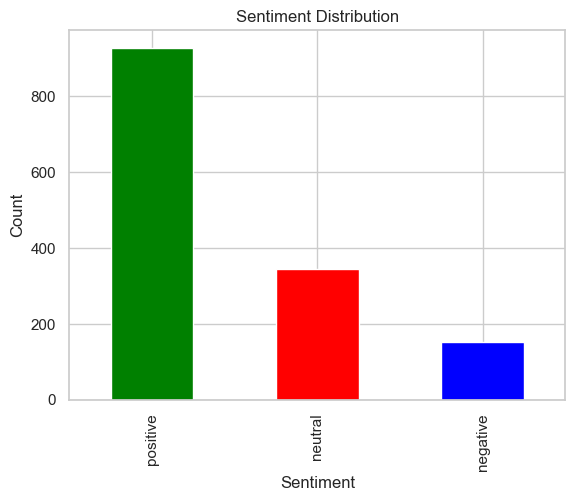

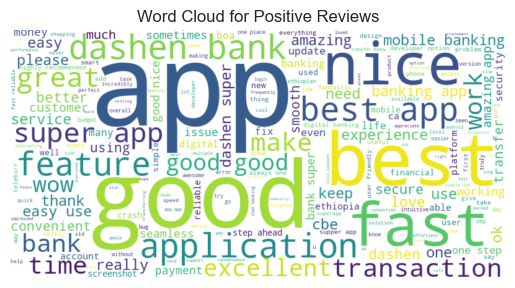

In [85]:
# === Plot Sentiment Distribution ===
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')      # Title for the plot
plt.xlabel('Sentiment')                  # X-axis label
plt.ylabel('Count')                      # Y-axis label
plt.show()                               # Display the bar chart

# === Generate Word Cloud for Positive Reviews ===
# Join all positive reviews into a single string
positive_text = ' '.join(positive_reviews)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')  # Render the word cloud
plt.axis('off')                                  # Turn off axis
plt.title('Word Cloud for Positive Reviews')     # Set the title
plt.show()


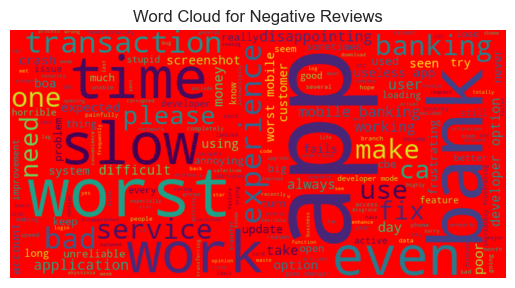

In [86]:
negative_text = ' '.join(negative_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

C:\Users\Bob\AppData\Local\Temp\ipykernel_14432\1242108575.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='vader_sentiment', palette=['green', 'blue', 'red'])


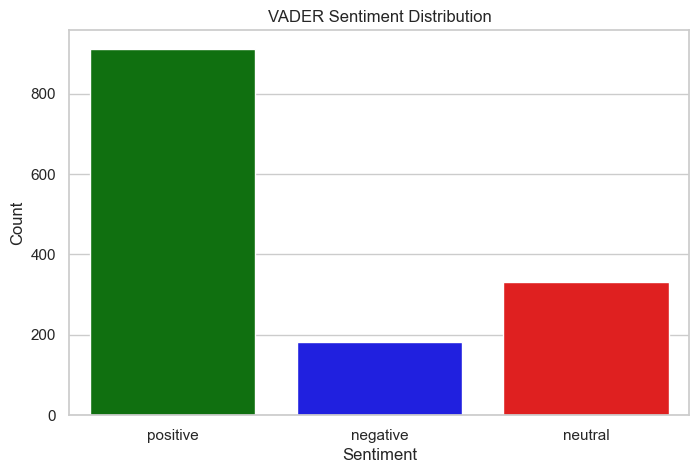

c:\Users\Bob\Desktop\10Acadamy\week2\customer-satisfaction\webscraper\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Bob\Desktop\10Acadamy\week2\customer-satisfaction\webscraper\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129324 (\N{SERIOUS FACE WITH SYMBOLS COVERING MOUTH}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Bob\Desktop\10Acadamy\week2\customer-satisfaction\webscraper\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128732 (\N{WIRELESS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Bob\Desktop\10Acadamy\week2\customer-satisfaction\webscraper\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127477 (\N{REGIONAL INDICATOR SYMBOL LETTER P}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Bob

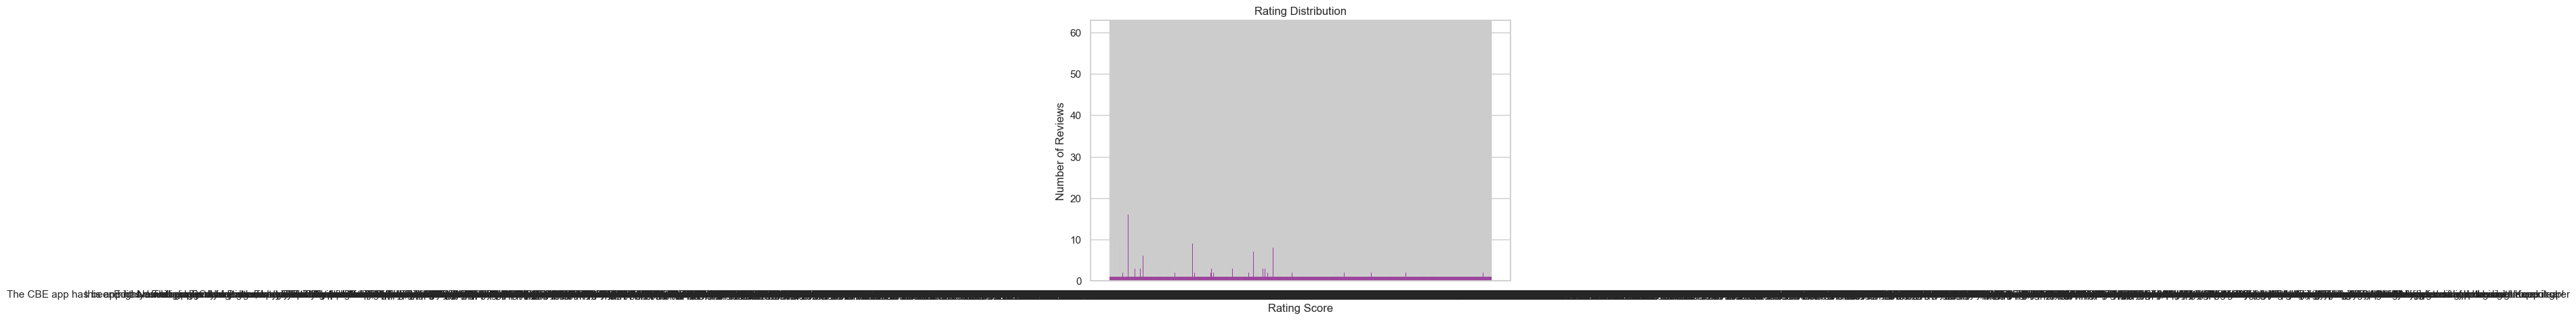

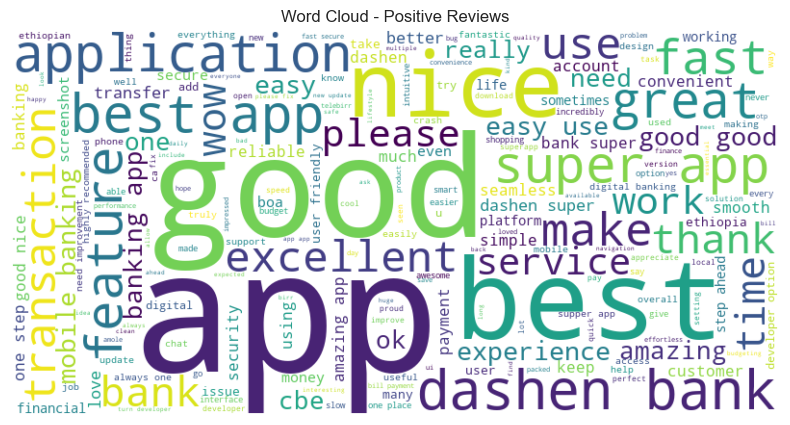

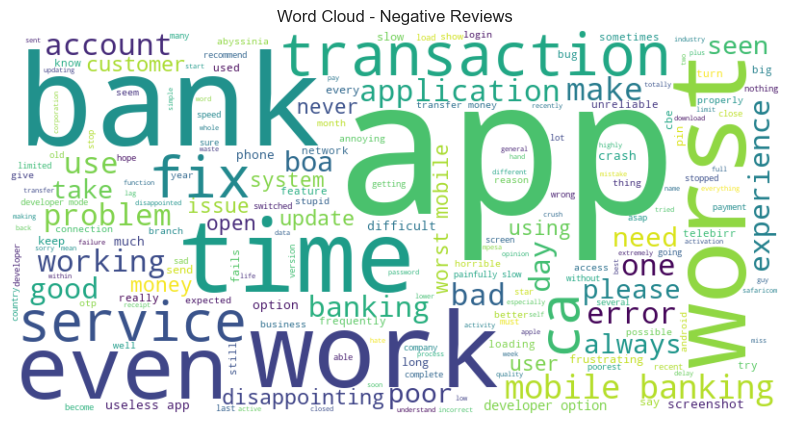

C:\Users\Bob\AppData\Local\Temp\ipykernel_14432\1242108575.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='vader_sentiment', y='review', palette=['green', 'blue', 'red'])
c:\Users\Bob\Desktop\10Acadamy\week2\customer-satisfaction\webscraper\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Bob\Desktop\10Acadamy\week2\customer-satisfaction\webscraper\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129324 (\N{SERIOUS FACE WITH SYMBOLS COVERING MOUTH}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Bob\Desktop\10Acadamy\week2\customer-satisfaction\webscraper\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128732 (\N{WIRELESS}) 

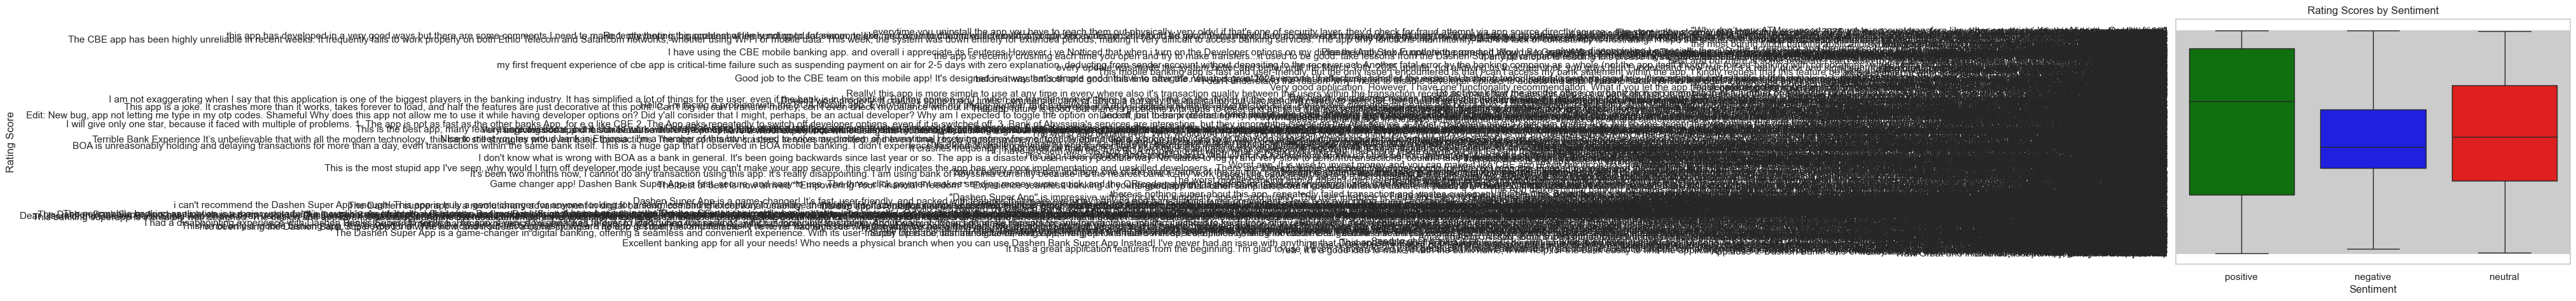

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set seaborn style
sns.set(style="whitegrid")

# 1. Sentiment Distribution Bar Plot (from vader_sentiment)
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='vader_sentiment', palette=['green', 'blue', 'red'])
plt.title('VADER Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# 2. Rating Distribution Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['review'], bins=5, kde=False, color='purple')
plt.title('Rating Distribution')
plt.xlabel('Rating Score')
plt.ylabel('Number of Reviews')
plt.show()

# 3. Word Cloud for Positive Reviews
positive_text = ' '.join(df[df['vader_sentiment'] == 'positive']['processed_review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Reviews')
plt.show()

# 4. Word Cloud for Negative Reviews
negative_text = ' '.join(df[df['vader_sentiment'] == 'negative']['processed_review'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Reviews')
plt.show()

# 5. Sentiment vs Rating Box Plot
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='vader_sentiment', y='review', palette=['green', 'blue', 'red'])
plt.title('Rating Scores by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Rating Score')
plt.show()
